# PCA


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [35]:
data = pd.read_csv('DATA_Housing_Prices.csv')

In [37]:
# Let's construct a dataframe with this features
data['Antiquity'] = data['YrSold'] - data['YearRemodAdd']

X = data.drop(columns=['Id','SalePrice','YearBuilt', 'YearRemodAdd', 'YrSold',
                       'LotFrontage','MasVnrArea','GarageYrBlt'], axis = 1)
y = np.log(data['SalePrice'])

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Antiquity
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [38]:
X_cols = X.select_dtypes(include=np.number).columns
X = X.select_dtypes(include=np.number)

X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Antiquity
0,60,8450,7,5,706,0,150,856,856,854,...,548,0,61,0,0,0,0,0,2,5
1,20,9600,6,8,978,0,284,1262,1262,0,...,460,298,0,0,0,0,0,0,5,31
2,60,11250,7,5,486,0,434,920,920,866,...,608,0,42,0,0,0,0,0,9,6
3,70,9550,7,5,216,0,540,756,961,756,...,642,0,35,272,0,0,0,0,2,36
4,60,14260,8,5,655,0,490,1145,1145,1053,...,836,192,84,0,0,0,0,0,12,8


In [39]:
X.isna().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
Antiquity        0
dtype: int64

# Scaling the data before PCA

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)

In [42]:
X_train.shape

(1022, 31)

# Performing PCA

In [43]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test  = pca.transform(X_test)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(X.columns)+1))]

X_train = pd.DataFrame(X_train, columns = cols)
X_test  = pd.DataFrame(X_test , columns = cols)

#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

In [46]:
X_train.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31
0,0.941454,0.345513,-2.112678,1.660708,-0.452819,0.104519,0.265846,-0.543530,0.242605,-0.068156,...,-0.480751,0.265092,0.139323,0.542344,0.105571,0.666165,-0.172675,-0.006821,-6.382582e-16,-2.486303e-16
1,-2.107544,0.860526,0.401491,-2.145899,2.044390,0.026212,0.147927,0.476597,-1.206812,0.924042,...,-0.502128,-0.884767,-1.061572,-1.410468,0.167552,0.658051,-0.306940,-0.047905,-2.892170e-16,-4.261102e-16
2,0.631129,-1.755853,-1.144649,-1.749626,-0.139473,-0.046576,0.344210,-0.548844,-0.099450,-0.126007,...,0.367198,0.163487,0.268237,0.085463,-0.238612,-0.053587,0.024210,0.438600,3.418339e-16,5.648696e-16
3,3.932944,0.935698,-3.826203,1.154840,-0.540938,1.228420,-0.153198,-0.029159,-0.716549,0.329924,...,-0.395770,-0.562257,0.341707,-0.316715,-0.297497,0.266608,0.027728,-0.090186,8.836496e-17,1.090736e-15
4,0.725932,-0.413855,1.562954,-1.820942,-0.565672,-0.015590,0.544393,-1.357035,-0.693071,0.104439,...,0.297722,-0.223689,0.433532,0.884804,0.001743,-0.231202,-0.365035,0.055632,-1.191479e-16,1.731801e-17


# Getting variances

In [11]:
# Getting
print(pca.explained_variance_ratio_) # Individual variances of each principal components
#print(pca.singular_values_)

[1.95647880e-01 9.92818113e-02 6.85530557e-02 5.90067826e-02
 4.75434968e-02 3.93473881e-02 3.71146490e-02 3.52248651e-02
 3.41908311e-02 3.31054042e-02 3.15754859e-02 3.11760392e-02
 2.98620215e-02 2.87441856e-02 2.81198161e-02 2.69006068e-02
 2.56107816e-02 2.43162090e-02 2.11343301e-02 1.99361673e-02
 1.80217404e-02 1.38315490e-02 1.24798515e-02 8.92806905e-03
 8.44527982e-03 8.16602907e-03 6.26052596e-03 4.20425906e-03
 3.27088864e-03 3.85847410e-32 2.75087554e-33]


In [12]:
variances = pca.explained_variance_ratio_.tolist()

In [13]:
variances[:2]

[0.19564788034362157, 0.09928181134833847]

In [47]:
total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cum_variance': total_variance})
scree.head(6)

,num_pca,variance,cum_variance
0,1,0.525403,0.525403
1,2,0.130041,0.655444
2,3,0.103425,0.758869
3,4,0.089549,0.848418
4,5,0.064804,0.913222
5,6,0.048159,0.961382


<AxesSubplot:xlabel='num_pca', ylabel='cum_variance'>

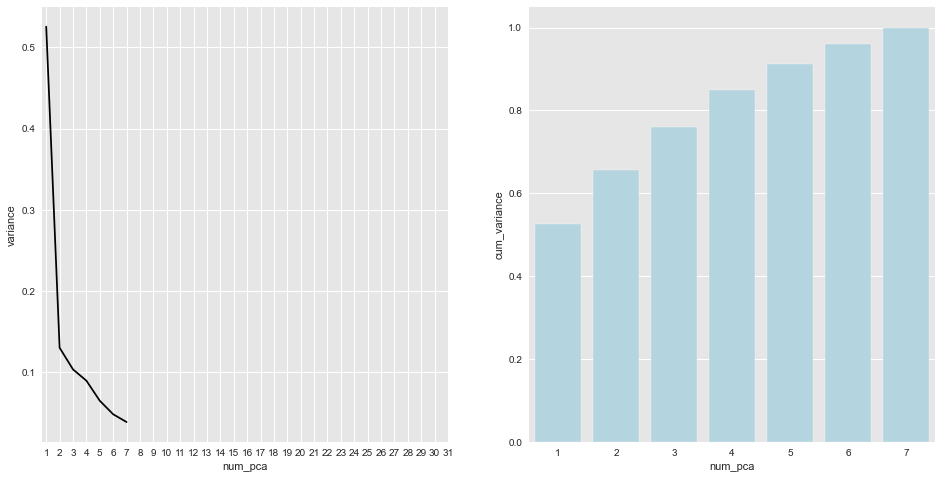

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,32))
sns.barplot(x="num_pca", y="cum_variance", data=scree, ax = ax[1], color = 'lightblue')

Here we have a very bad scenario. On the left plot it looks that there is an elbow at 6 pca's. However, with five principal components we are only able to explain

```
cum_variance[6] = 0.51
```

only 51% of the total variability of the data!!!

Bear in mind that we only selected the numerical columns and we didn't take into account the categorical ones. 


# Getting the pca coeficients

In [16]:
pca.components_

array([[-1.05200957e-02,  1.27389175e-01,  3.14161242e-01,
        -5.75828096e-02,  1.35557849e-01, -5.23239544e-03,
         1.39099420e-01,  2.76249457e-01,  2.82716243e-01,
         1.75098454e-01,  1.45902462e-02,  3.54203654e-01,
         6.55478804e-02, -2.24434911e-02,  2.83142136e-01,
         1.36580975e-01,  1.53922311e-01,  2.81740861e-03,
         2.92254809e-01,  2.12274158e-01,  2.91546795e-01,
         2.90989761e-01,  1.50691478e-01,  1.57031478e-01,
        -5.88585866e-02,  1.62284147e-02,  4.93714233e-02,
         9.17984732e-02,  9.96282703e-03,  3.10254017e-02,
        -2.02061410e-01],
       [-2.30851313e-01,  1.05029680e-01,  4.33960071e-02,
        -4.08811490e-02,  3.34486818e-01,  9.80821479e-02,
        -7.96409870e-02,  2.97626580e-01,  2.53065846e-01,
        -4.22642728e-01, -1.09698469e-01, -1.75369614e-01,
         3.07233240e-01,  1.22948113e-02, -1.47130532e-01,
        -2.25910212e-01, -3.20230812e-01, -1.91956432e-01,
        -2.69580284e-01,  5.69

In [17]:
# Fisrt pca components
pca.components_[0,:]

array([-0.0105201 ,  0.12738917,  0.31416124, -0.05758281,  0.13555785,
       -0.0052324 ,  0.13909942,  0.27624946,  0.28271624,  0.17509845,
        0.01459025,  0.35420365,  0.06554788, -0.02244349,  0.28314214,
        0.13658097,  0.15392231,  0.00281741,  0.29225481,  0.21227416,
        0.2915468 ,  0.29098976,  0.15069148,  0.15703148, -0.05885859,
        0.01622841,  0.04937142,  0.09179847,  0.00996283,  0.0310254 ,
       -0.20206141])

In [18]:
for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,X.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

Principal component  1
[(12, 'GrLivArea', 0.35), (3, 'OverallQual', 0.31), (19, 'TotRmsAbvGrd', 0.29), (21, 'GarageCars', 0.29), (22, 'GarageArea', 0.29), (15, 'FullBath', 0.28), (9, '1stFlrSF', 0.28), (8, 'TotalBsmtSF', 0.28), (20, 'Fireplaces', 0.21), (31, 'Antiquity', -0.2), (10, '2ndFlrSF', 0.18), (24, 'OpenPorchSF', 0.16), (17, 'BedroomAbvGr', 0.15), (23, 'WoodDeckSF', 0.15), (7, 'BsmtUnfSF', 0.14), (16, 'HalfBath', 0.14), (5, 'BsmtFinSF1', 0.14), (2, 'LotArea', 0.13), (28, 'PoolArea', 0.09), (13, 'BsmtFullBath', 0.07), (25, 'EnclosedPorch', -0.06), (4, 'OverallCond', -0.06), (27, 'ScreenPorch', 0.05), (30, 'MoSold', 0.03), (14, 'BsmtHalfBath', -0.02), (26, '3SsnPorch', 0.02), (11, 'LowQualFinSF', 0.01), (1, 'MSSubClass', -0.01), (29, 'MiscVal', 0.01), (6, 'BsmtFinSF2', -0.01), (18, 'KitchenAbvGr', 0.0)]

Principal component  2
[(10, '2ndFlrSF', -0.42), (5, 'BsmtFinSF1', 0.33), (17, 'BedroomAbvGr', -0.32), (13, 'BsmtFullBath', 0.31), (8, 'TotalBsmtSF', 0.3), (19, 'TotRmsAbvGrd', -

# Generating a regression model with the pca

In [19]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

def show_errors(y_real_train, y_pred_train, y_real_test, y_pred_test):

    plt.style.use('seaborn') 

    fig, ax = plt.subplots(2,2,figsize=(10,10))
    
    ax[0,0].scatter(x = np.exp(y_real_train), y = np.exp(y_pred_train), c = 'green')
    ax[0,0].plot([0,700000], [0,700000], linestyle = '--',c = 'black')
    ax[0,0].set_xlim(0,700000)
    ax[0,0].set_ylim(0,700000)

    ax[0,0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,0].set_title('Train set')

    ax[0,1].hist(x = np.exp(y_real_train)-np.exp(y_pred_train), bins = 50,color = 'green')
    ax[0,1].set_xlim(-200000,200000)
    ax[0,1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,1].set_title('Train set')

    ax[1,0].scatter(x = np.exp(y_real_test), y = np.exp(y_pred_test), c = 'blue')
    ax[1,0].plot([0,700000], [0,700000], linestyle = '--',c = 'black')
    ax[1,0].set_xlim(0,700000)
    ax[1,0].set_ylim(0,700000)
    ax[1,0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,0].set_title('Test set')   

    ax[1,1].hist(x = np.exp(y_real_test)-np.exp(y_pred_test), bins = 50,color = 'blue')
    ax[1,1].set_xlim(-200000,200000)
    ax[1,1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,1].set_title('Test set')

    fig.tight_layout()
    pass

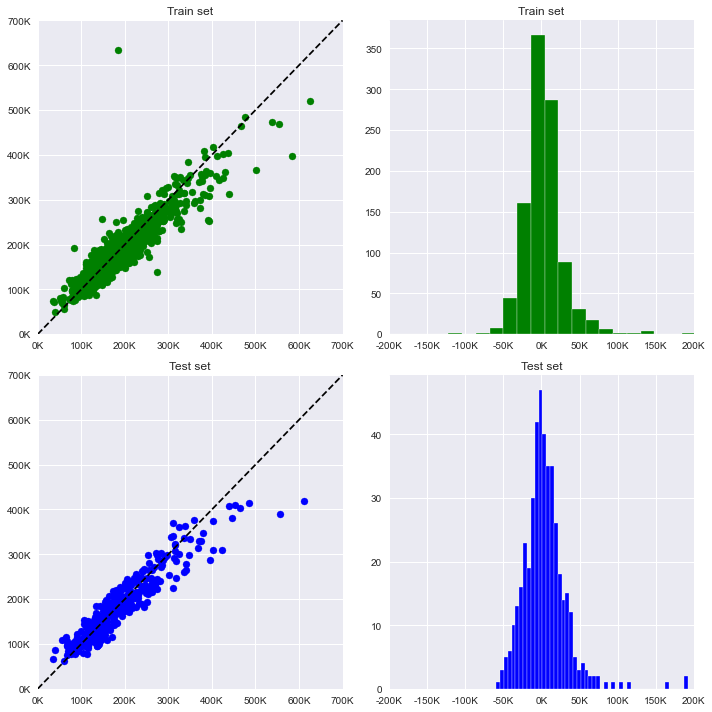

In [20]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

y_pred_train = lm.predict(X_train)
y_pred_test  = lm.predict(X_test)

show_errors(y_train, y_pred_train, y_test, y_pred_test)

In [22]:
#sns.pairplot(6)

# Doing the same preprocessing

In [23]:
def preprocessing(df):
    '''
    Function to trasnform an input dataframe.
    It will add another column named "Antiquity"
    Drop all the Year related columns
    Drop any column not in
    cols_to_keep = ['Id',
   'OverallQual',
   'TotalBsmtSF',
   'GrLivArea',
   'FullBath',
   'KitchenQual',
   'GarageCars',
   'Antiquity',
   'SalePrice']
    Replace values of variable KitchenQual to
    {'Fa': 1, 'TA': 1.61, 'Gd': 1.61, 'Ex': 3.14}
    Drop any row with 'LotArea' < 25000   
    Input: 
    df = Pandas DataFrame object
    Output:
    Transformed DataFrame
    '''
    df2 = df.copy()

    # Computing Antiquity
    df2['Antiquity'] = df2['YrSold'] - df2['YearRemodAdd']
    year_cols = ['YearBuilt', 'YearRemodAdd', 'YrSold']
    df2.drop(columns = year_cols, axis = 1, inplace = True)

    # Filtering by LotArea
    df2 = df2[df2['LotArea'] < 25000 ]

    # Droping unwanted columns
    cols_to_keep = ['Id',
   'OverallQual',
   'TotalBsmtSF',
   'GrLivArea',
   'FullBath',
   'KitchenQual',
   'GarageCars',
   'Antiquity',
   'SalePrice']
    df2 = df2[cols_to_keep]

    # Replacing KitchenQual values by numerical ones.
    df2['KitchenQual'] = df2['KitchenQual'].replace({'Fa': 1, 'TA': 1.61, 'Gd': 1.61, 'Ex': 3.14})

    return df2